# Random Forest

In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
def find_optimum_hyperparameters(X_train,y_train,X_val,y_val, estimators):

    validation_scores = []
    train_scores = []

    for i in range(len(estimators)):

        rf = RandomForestClassifier(random_state=0,n_estimators=estimators[i],min_samples_split=5,max_depth=15)

        rf.fit(X_train, y_train);

         # train on traning set
        train_scores.append(rf.score(X_train, y_train))
        # test on validation set
        validation_scores.append(rf.score(X_val,y_val))
    return train_scores,validation_scores

In [ ]:
X_train_scaled = np.loadtxt("Data_files/x_train_scaled.csv",delimiter=',')
y_train_scaled = np.loadtxt("Data_files/y_train_scaled.csv",delimiter=',', dtype=str)
X_val_scaled = np.loadtxt("Data_files/x_val_scaled.csv",delimiter=',')
y_val_scaled = np.loadtxt("Data_files/y_val_scaled.csv",delimiter=',', dtype=str)
X_test_scaled = np.loadtxt("Data_files/x_test_scaled.csv",delimiter=',')
y_test_scaled = np.loadtxt("Data_files/y_test_scaled.csv",delimiter=',', dtype=str)

In [ ]:
estimators = [10, 50, 100, 300, 500]
train_accuracy, validation_accuracy = find_optimum_hyperparameters(X_train_scaled,y_train_scaled,X_val_scaled,y_val_scaled,estimators)

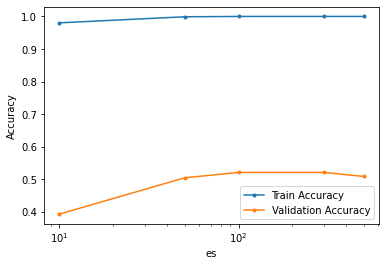

In [ ]:
plt.figure()
plt.plot(estimators, train_accuracy,label="Train Accuracy",marker='.')
plt.plot(estimators, validation_accuracy,label="Validation Accuracy",marker='.')
plt.xscale('log')
plt.xlabel('es')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('EDA_plot/randomforest_train_validation.png')
plt.show();

In [ ]:
rf = RandomForestClassifier(random_state=0,n_estimators=150,min_samples_split=5,max_depth=15)

rf.fit(X_train_scaled, y_train_scaled)

y_pred = rf.predict(X_test_scaled)
print("Random Forest Classifier accuracy: ", accuracy_score(y_test_scaled, y_pred))


Random Forest Classifier accuracy:  0.5481481481481482


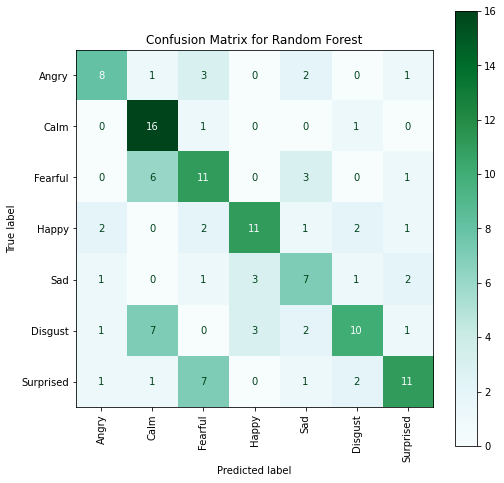

In [ ]:
cm_rf = confusion_matrix(y_test_scaled, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad','Disgust','Surprised'])
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix for Random Forest')

disp_rf.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.savefig('EDA_plot/rf_confusion_matrix.png')
plt.show()

In [ ]:
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.52      0.89      0.65        18
           2       0.44      0.52      0.48        21
           3       0.65      0.58      0.61        19
           4       0.44      0.47      0.45        15
           5       0.62      0.42      0.50        24
           6       0.65      0.48      0.55        23

    accuracy                           0.55       135
   macro avg       0.56      0.56      0.55       135
weighted avg       0.57      0.55      0.54       135

